In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from ggplot import *

import rating_utils

%matplotlib inline

### 1. Data processing
We load the training data and split it into training and test set

In [2]:
data = pd.read_csv('data/12-13.csv')

indices = np.random.rand(len(data)) < 0.8

train = data[indices].reset_index()
test = data[~indices].reset_index()

print rating_utils.get_teams(data)

print len(train), len(test)

['Washington Wizards' 'Dallas Mavericks' 'Boston Celtics'
 'Sacramento Kings' 'Houston Rockets' 'Memphis Grizzlies'
 'San Antonio Spurs' 'Denver Nuggets' 'Golden State Warriors'
 'Los Angeles Lakers' 'Indiana Pacers' 'Oklahoma City Thunder'
 'Milwaukee Bucks' 'Chicago Bulls' 'Los Angeles Clippers' 'Utah Jazz'
 'Miami Heat' 'Portland Trail Blazers' 'Detroit Pistons' 'Toronto Raptors'
 'New Orleans Hornets' 'Charlotte Bobcats' 'Cleveland Cavaliers'
 'Philadelphia 76ers' 'Atlanta Hawks' 'Phoenix Suns'
 'Minnesota Timberwolves' 'New York Knicks' 'Orlando Magic' 'Brooklyn Nets']
1013 216


Let's plot the score difference distribution

/home/young/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


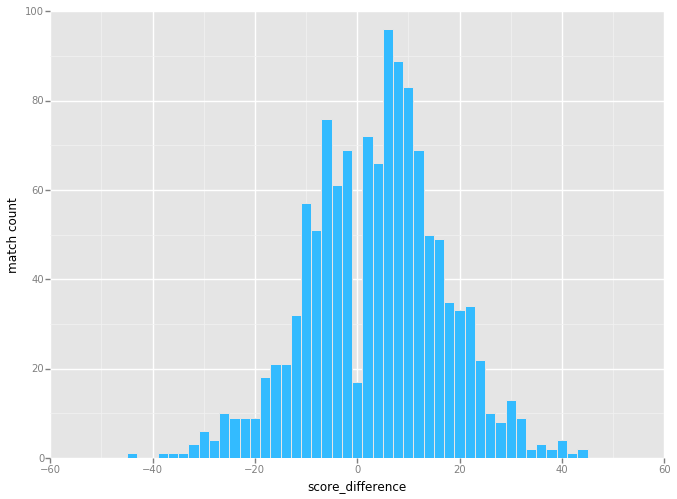

<ggplot: (8750702987929)>

In [3]:
ggplot(pd.DataFrame({'score_difference': data['HomePTS'] - data['VisitorPTS']}), aes(x='score_difference')) \
    + geom_histogram(fill='#33bbff', binwidth=2) \
    + ylab('match count')

### 2. Fit and test Massey's method
We fit and test Massey's method.

We calculate the ratings and plot out the distribution.

[-2.91939538 -0.75015519 -1.0181473  -4.5161037   3.45817541  4.61214817
  7.3621125   5.76608111  1.99678793  1.24933899  3.50799918  8.40481289
 -1.86344157 -1.50974648  7.21473542  0.10207773  6.64551964 -2.35933007
 -3.67504206 -3.05940091 -2.79533321 -8.27406771 -4.16919967 -3.36120443
 -0.13788397 -6.53974283 -2.02876922  3.38909715 -6.09405829  1.3621359 ]


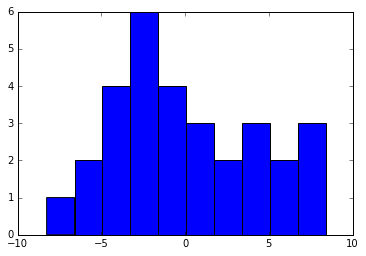

In [4]:
massey_model = rating_utils.MasseyMethod()
massey_model.fit(train, rating_utils.get_teams(data))
print massey_model.ratings

plt.hist(massey_model.ratings)
pass

We now compute the prediction accuracy and cross entropy loss

In [5]:
print "Training and testing accuracy:"
print massey_model.test_accuracy(train), massey_model.test_accuracy(test)
print "\nTraining and testing cross entropy loss:"
print massey_model.test_cross_entropy_loss(train), massey_model.test_cross_entropy_loss(test)

Training and testing accuracy:
0.780848963475 0.777777777778

Training and testing cross entropy loss:
0.600329049507 0.620613293906


### 3. Fit and test Markov's method on matches
We fit and test Markov's method on match results.

We calculate the ratings and plot out the distribution.

[ 0.03062339  0.02710368  0.03360547  0.02091152  0.03566056  0.04992576
  0.05142161  0.05096523  0.04257244  0.03790106  0.0431352   0.05319512
  0.02781335  0.02587035  0.05078166  0.0339327   0.05435069  0.03483837
  0.01927146  0.02062579  0.02267212  0.01496599  0.01752853  0.0262743
  0.03322431  0.0163014   0.02935294  0.04896367  0.01232674  0.0338846 ]


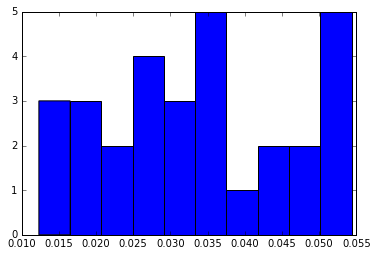

In [6]:
markov_match_model = rating_utils.MarkovMatchMethod()
markov_match_model.fit(train, rating_utils.get_teams(data))
print markov_match_model.ratings

plt.hist(markov_match_model.ratings)
pass

We now compute the prediction accuracy and cross entropy loss

In [7]:
print "Training and testing accuracy:"
print markov_match_model.test_accuracy(train), markov_match_model.test_accuracy(test)
print "\nTraining and testing cross entropy loss:"
print markov_match_model.test_cross_entropy_loss(train), markov_match_model.test_cross_entropy_loss(test)

Training and testing accuracy:
0.787759131293 0.768518518519

Training and testing cross entropy loss:
0.616272845502 0.63104815668


### 4. Fit and test Markov's method on score
We fit and test Markov's method on match score.

We calculate the ratings and plot out the distribution.

[ 0.02448132  0.02480406  0.02796963  0.01583665  0.04764125  0.04985001
  0.06879986  0.05085831  0.04291523  0.03362717  0.04259194  0.07089111
  0.02411603  0.01606544  0.06318803  0.03212765  0.05688141  0.03357413
  0.0183962   0.01504105  0.02575685  0.00903598  0.01069817  0.02103108
  0.02879364  0.01213793  0.03321876  0.05609441  0.00955463  0.03402208]


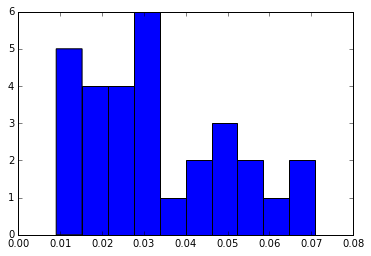

In [8]:
markov_score_model = rating_utils.MarkovScoreMethod()
markov_score_model.fit(train, rating_utils.get_teams(data))
print markov_score_model.ratings

plt.hist(markov_score_model.ratings)
pass

We now compute the prediction accuracy and cross entropy loss

In [9]:
print "Training and testing accuracy:"
print markov_score_model.test_accuracy(train), markov_score_model.test_accuracy(test)
print "\nTraining and testing cross entropy loss:"
print markov_score_model.test_cross_entropy_loss(train), markov_score_model.test_cross_entropy_loss(test)

Training and testing accuracy:
0.775913129319 0.782407407407

Training and testing cross entropy loss:
0.611818417472 0.63340188316
